# Electron hybrid code for R/L-waves with stationary ions

## 1. The model
The electron hybrid model for cold fluid electrons and hot kinetic electrons reads

\begin{align}
\frac{\partial \textbf{j}_\text{c}}{\partial t} = \epsilon_0\Omega_{\text{pe}}^2\textbf{E} + \Omega_\text{ce}\textbf{j}_\text{c}\times\textbf{e}_z,  \\
\frac{1}{c^2}\frac{\partial \textbf{E}}{\partial t} = \nabla\times\textbf{B} - \mu_0(\textbf{j}_\text{c} + \textbf{j}_\text{h}), \\
\frac{\partial \textbf{B}}{\partial t}=-\nabla\times\textbf{E}, \\
\frac{\partial f_\text{h}}{\partial t} + \textbf{v}\cdot\nabla f_\text{h} + \frac{q}{m}(\textbf{E}+\textbf{v}\times\textbf{B})\cdot\nabla_v f_\text{h}=0, \\
\textbf{j}_\text{h} = q\int\text{d}^3\textbf{v}\,\textbf{v}f_\text{h}.
\end{align}

where $\Omega_\text{ce}=\frac{q B_0}{m}$ is the signed cyclotron frequency and $\Omega_{\text{pe}}^2=\frac{n_\text{c}e^2}{\epsilon_0 m}$ the plasma frequency of the cold electrons. Here, only wave propagation parallel to the background magnetic field $\textbf{B}_0=B_0\textbf{e}_z$ is considered, i.e. $\textbf{k}=k\textbf{e}_z$. Therefore the nabla operator is simply $\nabla=\textbf{e}_z\partial_z$.

The first three equations are written in the compact form 

\begin{align}
\partial_t \textbf{U}+A_1\partial_z \textbf{U}+A_2\textbf{U}=\textbf{F},
\end{align}

for the electromagnetic fields $\textbf{E},\textbf{B}$ and the cold current density $\textbf{j}_\text{c}$, i.e. $\textbf{U}=(E_x,E_y,B_x,B_y,j_{\text{c}x},j_{\text{c}y})$. The z-components do not appear because they correspond to electrostatic waves which are not considered in this work. The matrices are

\begin{align}
A_1=
\begin{pmatrix}
0 &0  &0 &c^2  &0 &0 \\
0 &0  &-c^2 &0 &0 &0 \\
0 &-1  &0 &0 &0 &0  \\
1 &0  &0 &0 &0 &0  \\
0 &0  &0 &0 &0 &0   \\
0 &0  &0 &0 &0 &0 
\end{pmatrix}
\end{align}

and 

\begin{align}
A_2=
\begin{pmatrix}
0 &0 &0 &0 &\mu_0c^2 &0 \\
0 &0 &0 &0 &0 &\mu_0c^2 \\
0 &0 &0 &0 &0 &0 \\
0 &0 &0 &0 &0 &0 \\
-\epsilon_0\Omega_{\text{pe}}^2 &0 &0 &0 &0 &-\Omega_{\text{ce}} \\
0 &-\epsilon_0\Omega_{\text{pe}}^2 &0 &0 &\Omega_{\text{ce}} &0 \\
\end{pmatrix}
\end{align}

with $\Omega_{\text{ce}}=-\frac{eB_0}{m}<0$ for electrons. The inhomogeneity is 

\begin{align}
\textbf{F}=
\begin{pmatrix}
-\mu_0c^2 j_{\text{h}x} \\
-\mu_0c^2 j_{\text{h}y} \\
0 \\
0 \\
0 \\
0
\end{pmatrix}.
\end{align}


## 2. Dispersion relation
Linear theory of the above model leads to the following general dispersion relation for an arbitrary equilibrium distribution function $f^0=f^0(v_\parallel,v_\bot)$:


\begin{align}
D_{\text{R/L}}(k,\omega)=1-\frac{c^2k^2}{\omega^2}-\frac{\Omega_{\text{pe}}^2}{\omega(\omega\pm\Omega_{\text{ce}})}+\nu_\text{h}\frac{\Omega_{\text{pe}}^2}{\omega}\int\text{d}^3\textbf{v}\frac{v_\bot}{2}\frac{\hat{G}f_\text{h}^0}{\omega\pm\Omega_{\text{ce}}-kv_\parallel}=0.
\end{align}

Here $\nu_\text{h}=n_\text{h}/n_\text{c}\ll1$ is the ratio between the hot and cold electron number densities, respectively, $\text{d}^3\textbf{v}=\text{d}v_\parallel\text{d}v_\bot v_\bot 2\pi$ and the differential operator

\begin{align}
\hat{G}=\frac{\partial}{\partial v_\bot}+\frac{k}{\omega}\left(v_\bot\frac{\partial}{\partial v_\parallel}-v_\parallel\frac{\partial}{\partial v_\bot}\right).
\end{align}

For an anisotropic Maxwellian 

\begin{align}
f^0(v_\parallel,v_\bot) = \frac{1}{(2\pi)^{3/2}w_\parallel w_\bot^2}\exp\left(-\frac{v_\parallel^2}{2w_\parallel^2}-\frac{v_\bot^2}{2w_\bot^2}\right)
\end{align}

the dispersion relation is given by

\begin{align}
D_{\text{R/L}}(k,\omega)=D_{\text{cold,R/L}}(k,\omega)+\nu_\text{h}\frac{\Omega_{\text{pe}}^2}{\omega^2}\left[\frac{\omega}{k\sqrt{2}w_\parallel}Z(\xi^{\pm})-\left(1-\frac{w_\bot^2}{w_\parallel^2}\right)(1+\xi^{\pm} Z(\xi^{\pm}))\right]=0, 
\end{align}

where $Z$ is the plasma dispersion function and 

\begin{align}
\xi^{\pm} = \frac{\omega\pm\Omega_\text{ce}}{k\sqrt{2}w_\parallel}.
\end{align}

## 3. Discretization
For the fields, B-spline Finite Elements are used together with a Crank-Nicolson time discretization which leads to the following matrix formulation:

\begin{align}
\left[M+\frac{1}{2}\Delta tCA_1+\frac{1}{2}\Delta tMA_2\right]\textbf{U}^{n+1}=\left[M-\frac{1}{2}\Delta tCA_1-\frac{1}{2}\Delta tMA_2\right]\textbf{U}^{n} + \Delta t \tilde{\textbf{F}}^{n+1/2},
\end{align}

with the mass and convection matrices

\begin{align}
M_{ij}=\int\varphi_i\varphi_j\,\text{d}z, \\
C_{ij}=\int\varphi_i\varphi_j^\prime\,\text{d}z
\end{align}

The hot current density is obtained using PIC techniques, i.e. the distribution function reads

\begin{align}
f_\text{h}(z,\textbf{v},t) \approx \frac{1}{N_k}\sum_k w_k\delta(z-z_k(t))\delta(\textbf{v}-\textbf{v}_k(t))
\end{align},

with the orbit equations

\begin{align}
\frac{\text{d}z_k}{dt}=v_{kz}, \\
\frac{\text{d}\textbf{v}_k}{dt}=\frac{q}{m}(\textbf{E}_k+\textbf{v}_k\times\textbf{B}_k).
\end{align}
With the definition of $f_\text{h}$ the inhomogeneity $\tilde{\textbf{F}}^{n+1/2}$ is

\begin{align}
\tilde{F}^{n+1/2}_i = -c^2\mu_0q\frac{1}{N_k}\sum_k w_k\textbf{v}_k^{n+1/2}\varphi_i(z_k^{n+1/2}).
\end{align}

In [73]:
import numpy as np
import time
from copy import deepcopy
from scipy.linalg import block_diag
import Utilitis_HybridCode as utils
from hammersley import hammersley_sequence
from scipy.stats import norm


# ... start the simulation from the beginning (0) or continue (1)
restart = 0 
# ...

# ... directory for saving data
title = 'Results/01_NoDipoleField/data_T=200_N=32_dt=0.0125_p=1_Np=5e6_amp=1e-4_NoCV.txt' 
# ...

# ... save only every saving_step-th time step
saving_step = 1
# ...

# ... switch on (1) and off (0) control variate
control = 0
# ...


# ... physical parameters
eps0 = 1.0                         # ... vacuum permittivity
mu0 = 1.0                          # ... vacuum permeability
c = 1.0                            # ... speed of light
qe = -1.0                          # ... electron charge
me = 1.0                           # ... electron mass
B0z = 1.0                          # ... background magnetic field in z-direction
wce = qe*B0z/me                    # ... electron cyclotron frequency
wpe = 2*np.abs(wce)                # ... cold electron plasma frequency
nuh = 6e-2                         # ... ratio of cold/hot electron densities (nh/nc)
nh = nuh*wpe**2                    # ... hot electron density
wpar = 0.2*c                       # ... parallel thermal velocity of energetic particles
wperp = 0.53*c                     # ... perpendicular thermal velocity of energetic particles
# ...



# ... parameters for initial conditions
k = 2                              # ... wavenumber of initial wave fields
ini = 3                            # ... initial conditions for wave fields
amp = 1e-4                         # ... amplitude of initial wave fields
eps = 0.0                          # ... amplitude of spatial pertubation of distribution function 
# ...



# ... numerical parameters
Lz = 2*np.pi/k                     # ... length of z-domain
Nz = 32                            # ... number of elements z-direction
T = 200.0                          # ... simulation time
dt = 0.05/4                        # ... time step
p = 1                              # ... degree of B-spline basis
Lv = 8                             # ... length of v-domain in each direction (vx,vy,vz)
Nv = 76                            # ... number of cells in each v-direction (vx,vy,vz)
Np = np.int(1e7)                   # ... number of energetic simulation particles 
# ...



# ... create parameter list
pa = np.zeros(8*Nz + 5)

pa[0]  = eps0
pa[1]  = mu0
pa[2]  = c
pa[3]  = qe 
pa[4]  = me 
pa[5]  = B0z 
pa[6]  = wce 
pa[7]  = wpe 
pa[8]  = nuh 
pa[9]  = nh 
pa[10] = wpar 
pa[11] = wperp 
pa[12] = k 
pa[13] = ini 
pa[14] = amp 
pa[15] = eps 
pa[16] = Lz 
pa[17] = Nz 
pa[18] = T 
pa[19] = dt 
pa[20] = p 
pa[21] = Lv 
pa[22] = Nv 
pa[23] = Np 

pa[27] = 1
pa[30] = saving_step
# ...



# ... discretization parameters
dz = Lz/Nz
zj = np.linspace(0, Lz, Nz + 1)

dv = Lv/Nv
vj = np.linspace(-Lv/2, Lv/2, Nv+1)
# ...


# ... energies
Eh_eq = Lz*nh*me/2*(wpar**2 + 2*wperp**2)

en_B  = np.array([])
en_E  = np.array([])
en_jc = np.array([])
en_jh = np.array([])
# ...




# ... system matrices for fluid electrons and electromagnetic fields
A10 = np.array([0, 0, 0, +c**2, 0, 0])
A11 = np.array([0, 0, -c**2, 0, 0, 0])
A12 = np.array([0, -1, 0, 0, 0, 0])
A13 = np.array([+1, 0, 0, 0, 0, 0])
A14 = np.array([0, 0, 0, 0, 0, 0])
A15 = np.array([0, 0, 0, 0, 0, 0])
A1 = np.array([A10, A11, A12, A13, A14, A15])

A20 = np.array([0, 0, 0, 0, mu0*c**2, 0])
A21 = np.array([0, 0, 0, 0, 0, mu0*c**2])
A22 = np.array([0, 0, 0, 0, 0, 0])
A23 = np.array([0, 0, 0, 0, 0, 0])
A24 = np.array([-eps0*wpe**2, 0, 0, 0, 0, -wce])
A25 = np.array([0, -eps0*wpe**2, 0, 0, +wce, 0])
A2 = np.array([A20, A21, A22, A23, A24, A25])

s = int(np.sqrt(A1.size))

def B_background_z(z):
    return B0z*(1 + 0*(z - Lz/2)**2)
# ...




# ... time integration 
def update(uj, particles, Ep, Bp ,dt):
    
    
    # ... save old positions
    zold = deepcopy(particles[:, 0])
    # ...
    
    
    # ... update particle velocities from n-1/2 to n+1/2 with fields at time n and positions from n to n+1 with velocities at n+1/2
    znew, vnew = utils.borisPush(particles, dt, Bp, Ep, qe, me, Lz)
    # ...
    
    
    # ... update weights with control variate
    wnew = w0 - control*Maxwell(vnew[:, 0], vnew[:, 1], vnew[:, 2])/g0
    # ...
    
    
    # ... compute hot electron current densities
    jhnew = utils.hotCurrent(vnew[:, 0:2], 1/2*(znew + zold), wnew, zj, bsp, qe, c)
    # ...
     
    
    # ... assemble right-hand side of weak formulation
    Fh[0::s] = -c**2*mu0*jhnew[0::2]
    Fh[1::s] = -c**2*mu0*jhnew[1::2]
    # ...
    
    
    # ... time integration of E,B,jc from n to n+1 with Crank-Nicolson method (use hot current density at n+1/2) 
    ujnew = np.dot(LHSinv,np.dot(RHS, uj) + dt*Fh)
    # ...
    
    
    # ... compute fields at particle positions with new fields 
    Epnew, Bpnew = utils.fieldInterpolation(znew, zj, bsp, ujnew)
    # ...
    
    return znew, vnew, wnew, jhnew, ujnew, Epnew, Bpnew
# ...






if restart == 0:


    # ... initial energetic particle distribution function (perturbed anisotropic Maxwellian)
    def fh0(z, vx, vy, vz, eps):
        return (1 + eps*np.cos(k*z))*nh/((2*np.pi)**(3/2)*wpar*wperp**2)*np.exp(-vz**2/(2*wpar**2) - (vx**2 + vy**2)/(2*wperp**2))
    # ...


    # ... Maxwellian for control variate
    def Maxwell(vx, vy, vz):
        return nh/((2*np.pi)**(3/2)*wpar*wperp**2)*np.exp(-vz**2/(2*wpar**2) - (vx**2 + vy**2)/(2*wperp**2))
    # ...


    # ... sampling distribution for initial markers
    def g_sampling(vx, vy, vz):
        return 1/((2*np.pi)**(3/2)*wpar*wperp**2)*np.exp(-vz**2/(2*wpar**2) - (vx**2 + vy**2)/(2*wperp**2))*1/Lz
    # ...



    # ... create periodic B-spline basis and quadrature grid
    bsp, N, quad_points, weights = utils.createBasis(Lz, Nz, p)
    # ...



    # ... matrices for linear system
    Nb = N - p                        # ... number of unique B-splines for periodic boundary conditions

    uj = np.zeros(s*Nb)               # ... coefficients for Galerkin approximation
    Fh = np.zeros(s*Nb)               # ... RHS of matrix system

    Mblock = np.zeros((s*Nb, s*Nb))   # ... block mass matrix    
    Cblock = np.zeros((s*Nb, s*Nb))   # ... block convection matrix

    u0 = np.zeros((Nb, s))            # ... L2-projection of initial conditions

    A1block = block_diag(*([A1]*Nb))  # ... block system matrix A1
    A2block = block_diag(*([A2]*Nb))  # ... block system matrix A2
    # ...





    # ... assemble mass and convection matrices
    timea = time.time()

    M,C = utils.matrixAssembly(bsp, weights, quad_points, B_background_z, 1)[0:2]

    timeb = time.time()
    print('time for matrix assembly: ' + str(timeb - timea))
    # ...





    # ... assemble u0
    timea = time.time()

    for qu in range (0, s):
        
        def initial(z):
            return utils.IC(z, ini, amp, k, omega = 0)[qu]

        u0[:,qu] = utils.L2proj(bsp, Lz, quad_points, weights, M, initial)

    uj = np.reshape(u0, s*Nb)

    timeb = time.time()
    print('time for initial vector assembly: ' + str(timeb - timea))
    # ...



    # ... construct block mass and convection matrices
    for i in range(0, s):
        Mblock[i::s, i::s] = M
        Cblock[i::s, i::s] = C
    # ...



    # ... create particles (z, vx, vy, vz, wk) and sample positions and velocities according to sampling distribution
    particles = np.zeros((Np ,5))
    particles[:, 0] = np.random.rand(Np)*Lz
    particles[:, 1] = np.random.randn(Np)*wperp
    particles[:, 2] = np.random.randn(Np)*wperp
    particles[:, 3] = np.random.randn(Np)*wpar
    
    #ham =  hammersley_sequence(0, Np - 1, 4, Np - 1)
    #particles[:, 0] = ham[0]*Lz
    #particles[:, 1] = norm.ppf(ham[1])*wperp
    #particles[:, 2] = norm.ppf(ham[2])*wperp
    #particles[:, 3] = norm.ppf(ham[3])*wpar
    
    #particles[0, 1] += wperp
    #particles[0, 2] += wperp
    #particles[0, 3] += wpar
    
    

    v_par = deepcopy(particles[0:100, 3])
    positions = deepcopy(particles[0:100, 0])
    # ...




    # ... parameters for control variate
    g0 = g_sampling(particles[:, 1], particles[:, 2], particles[:, 3])
    w0 = fh0(particles[:, 0], particles[:, 1], particles[:, 2], particles[:, 3], eps)/g_sampling(particles[:, 1], particles[:, 2], particles[:, 3])
    # ...



    # ... initial fields at particle positions
    Ep = np.zeros((Np, 3))
    Bp = np.zeros((Np, 3))
    Bp[:, 2] = B0z

    timea = time.time()

    Ep[:, 0:2], Bp[:, 0:2] = utils.fieldInterpolation(particles[:, 0], zj, bsp, uj)

    timeb = time.time()
    print('time for intial field interpolation: ' + str(timeb - timea))
    # ...




    
    # ... initialize velocities by pushing back by -dt/2, compute weights and energy of hot particles
    timea = time.time()
    
    particles[:, 1:4] = utils.borisPush(particles, -dt/2, Bp, Ep, qe, me, Lz)[1]
    particles[:, 4] = w0 - control*Maxwell(particles[:, 1], particles[:, 2], particles[:, 3])/g0
    
    timeb = time.time()
    print('time for intial particle push: ' + str(timeb - timea))
    #
    




    # ... compute matrices for field update
    timea = time.time()

    LHS = Mblock + 1/2*dt*np.dot(Cblock, A1block) + 1/2*dt*np.dot(Mblock, A2block)
    RHS = Mblock - 1/2*dt*np.dot(Cblock, A1block) - 1/2*dt*np.dot(Mblock, A2block)
    LHSinv = np.linalg.inv(LHS)

    timeb = time.time()
    print('time for update matrix computation: ' + str(timeb - timea))
    # ...




    
    # ... create data file and save parameters (first row), initial fields and energies (second row)
    file = open(title, 'ab')

    np.savetxt(file, np.reshape(pa, (1, 8*Nb + 5)), fmt = '%1.10e')

    data = np.append(uj, np.zeros(2*Nb))
    
    en_E  = np.append(en_E, eps0/2*(np.dot(uj[0::s], np.dot(M, uj[0::s])) + np.dot(uj[1::s], np.dot(M, uj[1::s]))))
    en_B  = np.append(en_B, eps0/(2*mu0)*(np.dot(uj[2::s], np.dot(M, uj[2::s])) + np.dot(uj[3::s], np.dot(M, uj[3::s]))))
    en_jc = np.append(en_jc, 1/(2*eps0*wpe**2)*(np.dot(uj[4::s], np.dot(M, uj[4::s])) + np.dot(uj[5::s], np.dot(M, uj[5::s]))))
    en_jh = np.append(en_jh, me/(2*Np)*np.dot(particles[:, 4], particles[:, 1]**2 + particles[:, 2]**2 + particles[:, 3]**2) + control*Eh_eq)
    
    data = np.append(data, np.array([en_E[-1], en_B[-1], en_jc[-1], en_jh[-1]]))
    
    data = np.append(data, 0.)
    np.savetxt(file, np.reshape(data, (1, 8*Nb + 5)), fmt = '%1.10e')
    # ...


    
    # ... time loop
    print('start time integration!')
    time_step = 0

    while True:

        try:
            if time_step*dt > T:
                file.close()
                break
            
            if time_step%50 == 0:
                print('time steps finished: ' + str(time_step))

            particles[:, 0], particles[:, 1:4], particles[:, 4], jh, uj, Ep[:, 0:2], Bp[:, 0:2] = update(uj, particles, Ep, Bp, dt)

            if time_step%saving_step == 0:
                
                # ... add data to file
                data = np.append(uj, jh)
                
                en_E  = np.append(en_E, eps0/2*(np.dot(uj[0::s], np.dot(M, uj[0::s])) + np.dot(uj[1::s], np.dot(M, uj[1::s]))))
                en_B  = np.append(en_B, eps0/(2*mu0)*(np.dot(uj[2::s], np.dot(M, uj[2::s])) + np.dot(uj[3::s], np.dot(M, uj[3::s]))))
                en_jc = np.append(en_jc, 1/(2*eps0*wpe**2)*(np.dot(uj[4::s], np.dot(M, uj[4::s])) + np.dot(uj[5::s], np.dot(M, uj[5::s]))))
                en_jh = np.append(en_jh, me/(2*Np)*np.dot(particles[:, 4], particles[:, 1]**2 + particles[:, 2]**2 + particles[:, 3]**2) + control*Eh_eq)
                
                v_par = np.vstack((v_par, particles[0:100, 3]))
                positions = np.vstack((positions, particles[0:100, 0]))
                  
                data = np.append(data, np.array([en_E[-1], en_B[-1], en_jc[-1], en_jh[-1]]))
                
                data = np.append(data, (time_step + 1)*dt)
                np.savetxt(file, np.reshape(data, (1, 8*Nb + 5)), fmt = '%1.10e')
                # ...
                
            time_step += 1
        except KeyboardInterrupt:
            print('Pausing...  (Hit ENTER to continue, type quit to exit.)')
            try:
                response = input()
                if response == 'quit':
                    break
                print('Resuming...')
            except KeyboardInterrupt:
                print('Resuming...')
                continue
    # ...


    file.close()
    

    
    
    
    
if restart == 1:
    
    # ... open data file that hasn't been finished yet
    file = open(title, 'ab')
    # ...


    # ... time loop
    print('total number of time steps: ' + str(Nt))

    for i in range(n, Nt):

        if i%50 == 0:
            print('time steps finished: ' + str(i))

        particles[:, 0], particles[:, 1:4], particles[:, 4], jh, uj, Ep[:, 0:2], Bp[:, 0:2] = update(uj, particles, Ep, Bp, dt)

        if i%10 == 0:
            # ... add data to file
            data = np.append(uj, jh)
            data = np.append(data, tn[i + 1])
            np.savetxt(file, np.reshape(data, (1, 8*Nb + 1)), fmt = '%1.5e')
            # ...
    # ...


    file.close()

time for matrix assembly: 0.04371285438537598
time for initial vector assembly: 0.050452470779418945
time for intial field interpolation: 4.104281187057495
time for intial particle push: 3.2504780292510986
time for update matrix computation: 0.00413203239440918
start time integration!
time steps finished: 0
Pausing...  (Hit ENTER to continue, type quit to exit.)
exit
Resuming...
Pausing...  (Hit ENTER to continue, type quit to exit.)
quit


# Analysis

# 1. Anisotropic case (wave growth)

## 1.1 Compare distribution functions

Text(0,0.5,'$\\delta f_\\mathrm{h}(v_\\perp)c^2/|\\Omega_\\mathrm{ce}|$')

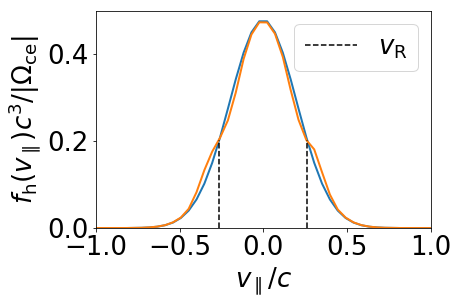

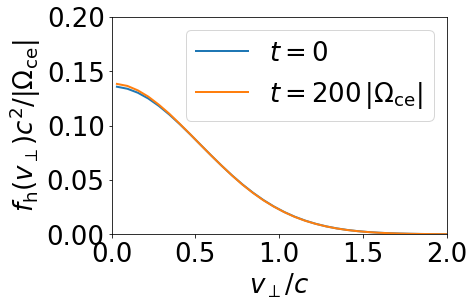

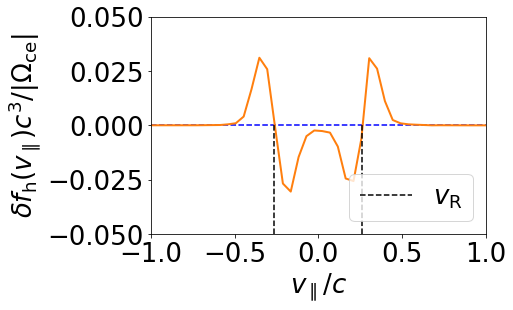

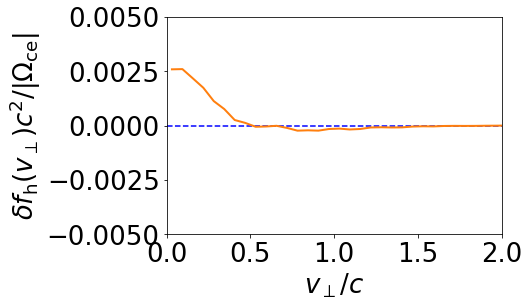

In [65]:
import matplotlib.pyplot as plt

fontsize = 26
#plt.rc('text', usetex = False)
#plt.rc('font',family = 'serif')
plt.rcParams.update({'font.size': fontsize})
plt.rc('xtick', labelsize = fontsize)
plt.rc('ytick', labelsize = fontsize)

Nbin_par = 128
Nbin_perp = 64

Lv_par = 6
Lv_perp = 4

dv_bin_par = Lv_par/Nbin_par
v_bin_par = np.linspace(-Lv_par/2, Lv_par/2, Nbin_par + 1)
v_bin_par = np.delete(v_bin_par, -1) + dv_bin_par/2
Vedges_par = np.linspace(-Lv_par/2, Lv_par/2, Nbin_par + 1)
binVol_par = dv_bin_par

dv_bin_perp = Lv_perp/Nbin_perp
v_bin_perp = np.linspace(0, Lv_perp, Nbin_perp + 1)
v_bin_perp = np.delete(v_bin_perp, -1) + dv_bin_perp/2
Vedges_perp = np.linspace(0, Lv_perp, Nbin_perp + 1)
binVol_perp = dv_bin_perp


# initial distribution
f_par_ini = fh0(0, 0, 0, v_bin_par, 0)*2*np.pi*wperp**2
f_perp_ini = fh0(0, v_bin_perp/np.sqrt(2), v_bin_perp/np.sqrt(2), 0, 0)*np.sqrt(2*np.pi)*wpar
# ...



# ... later distribution
Vbin_par = np.digitize(particles[:, 3], Vedges_par) - 1
Vbin_perp = np.digitize(np.sqrt(particles[:, 1]**2 + particles[:, 2]**2), Vedges_perp) - 1

f_par = np.bincount(Vbin_par, particles[:, 4], Nbin_par)/(Np*binVol_par*Lz) + control*f_par_ini
f_perp = np.bincount(Vbin_perp, particles[:, 4], Nbin_perp)/(Np*binVol_perp*Lz*v_bin_perp*2*np.pi) + control*f_perp_ini
# ...

# ... resonant velocity
omega = utils.solveDispersionHybrid(k, +1, c, wce, wpe, wpar, wperp, nuh, 0.5 + 0j, 1e-8)[0]
omega_r = np.real(omega)
gamma = np.imag(omega)
vR = np.abs((omega_r + wce)/k)
# ...

f1 = plt.figure()
f1.set_figheight(4)
f1.set_figwidth(6)


plt.plot(v_bin_par, f_par_ini, linewidth = 2)
plt.plot(v_bin_par, f_par, linewidth = 2)
plt.plot(np.ones(10)*vR, np.linspace(0, fh0(0, 0, 0, vR, 0)*2*np.pi*wperp**2, 10), 'k--', label = '$v_\mathrm{R}$')
plt.plot(-np.ones(10)*vR, np.linspace(0, fh0(0, 0, 0, vR, 0)*2*np.pi*wperp**2, 10), 'k--')
plt.ylim((0, 0.5))
plt.xlim((-1, 1))
plt.xlabel('$v_\parallel/c$')
plt.ylabel('$f_\mathrm{h}(v_\parallel)c^3/|\Omega_\mathrm{ce}|$')
plt.legend()
#plt.savefig('/home/florian/Schreibtisch/Masterarbeit/05_Präsentationen/04_Ringberg/01_Figures/Anisotropic_parallel_WithCV.pdf', bbox_inches = 'tight')

f2 = plt.figure()
f2.set_figheight(4)
f2.set_figwidth(6)

plt.plot(v_bin_perp, f_perp_ini, label = '$t=0$', linewidth = 2)
plt.plot(v_bin_perp, f_perp, label = '$t=200\,|\Omega_\mathrm{ce}|$', linewidth = 2)
plt.xlabel('$v_\perp/c$')
plt.ylabel('$f_\mathrm{h}(v_\perp)c^2/|\Omega_\mathrm{ce}|$')
plt.ylim((0, 0.2))
plt.xlim((0, 2))
plt.legend()
#plt.savefig('/home/florian/Schreibtisch/Masterarbeit/05_Präsentationen/04_Ringberg/01_Figures/Anisotropic_perp_WithCV.pdf', bbox_inches = 'tight')


f3 = plt.figure()
f3.set_figheight(4)
f3.set_figwidth(6)

plt.plot(-2, 0, linewidth = 2)
plt.plot(np.linspace(-1, 1, 10), np.zeros(10), 'b--')
plt.plot(v_bin_par, f_par - f_par_ini, linewidth = 2)
plt.plot(np.ones(10)*vR, np.linspace(-0.05, 0, 10), 'k--', label = '$v_\mathrm{R}$')
plt.plot(-np.ones(10)*vR, np.linspace(-0.05, 0, 10), 'k--')
plt.legend(loc = 4)

plt.xlim((-1, 1))
plt.ylim((-0.05, 0.05))
plt.xlabel('$v_\parallel/c$')
plt.ylabel('$\delta f_\mathrm{h}(v_\parallel)c^3/|\Omega_\mathrm{ce}|$')
#plt.savefig('/home/florian/Schreibtisch/Masterarbeit/05_Präsentationen/04_Ringberg/01_Figures/Anisotropic_Deltapar_WithCV.pdf', bbox_inches = 'tight')

f4 = plt.figure()
f4.set_figheight(4)
f4.set_figwidth(6)

plt.plot(-2, 0, linewidth = 2)
plt.plot(np.linspace(0, 2, 10), np.zeros(10), 'b--')
plt.plot(v_bin_perp, f_perp - f_perp_ini, linewidth = 2)
plt.xlim((0, 2))
plt.ylim((-0.005, 0.005))
plt.xlabel('$v_\perp/c$')
plt.ylabel('$\delta f_\mathrm{h}(v_\perp)c^2/|\Omega_\mathrm{ce}|$')
#plt.savefig('/home/florian/Schreibtisch/Masterarbeit/05_Präsentationen/04_Ringberg/01_Figures/Anisotropic_Deltaperp_WithCV.pdf', bbox_inches = 'tight')

## 1.2 Compare energies

In [20]:
en_par_ini = Lz*nh*me/2*wpar**2
en_perp_ini = Lz*nh*me/2*2*wperp**2
en_ini = en_par_ini + en_perp_ini

delta_en_par = me/(2*Np)*np.dot(particles[:, 4], particles[:, 3]**2)
delta_en_perp = me/(2*Np)*np.dot(particles[:, 4], particles[:, 1]**2 + particles[:, 2]**2)
delta_en = me/(2*Np)*np.dot(particles[:, 4], particles[:, 1]**2 + particles[:, 2]**2 + particles[:, 3]**2)

print('Initial parallel energy: ' + str(en_par_ini))
print('Initial perp energy: ' + str(en_perp_ini))
print('Initial hot energy: ' + str(en_ini))
print('-----------')
print('Delta parallel energy: ' + str(delta_en_par))
print('Delta perp energy: ' + str(delta_en_perp))
print('Final hot energy: ' + str((delta_en_par + delta_en_perp) + en_ini))
print('-----------')
print('Delta hot energy: ' + str(delta_en_par + delta_en_perp))

Initial parallel energy: 0.015079644737231009
Initial perp energy: 0.21179361033440952
Initial hot energy: 0.22687325507164052
-----------
Delta parallel energy: 0.0008592943169714048
Delta perp energy: -0.0017027263437904988
Final hot energy: 0.22602982304482142
-----------
Delta hot energy: -0.000843432026819094


## 1.3 Show evolution of magnetic field energy

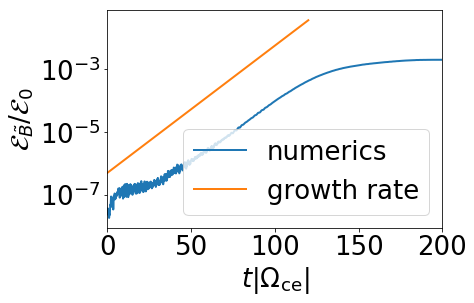

In [66]:
f3 = plt.figure()
f3.set_figheight(4)
f3.set_figwidth(6)

en_tot = en_B + en_E + en_jc + en_jh

Nt = len(en_B) - 1
tn = np.linspace(0, Nt*dt*saving_step, Nt + 1) 
tg = np.linspace(0, 120, 100)

omega = utils.solveDispersionHybrid(k, +1, c, wce, wpe, wpar, wperp, nuh, 0.5 + 0j, 1e-8)[0]
omega_r = np.real(omega)
gamma = np.imag(omega)

plt.semilogy(tn, en_B/en_tot[0], linewidth = 2, label = 'numerics')
plt.semilogy(tg, 5e-7*np.exp(tg*gamma*2), label = 'growth rate', linewidth = 2)

plt.xlim((0, 200))
plt.xlabel('$t|\Omega_\mathrm{ce}|$')
plt.ylabel(r'$\mathcal{E}_{\tilde{B}} / \mathcal{E}_{0}$')
plt.legend()
#plt.savefig('/home/florian/Schreibtisch/Masterarbeit/05_Präsentationen/04_Ringberg/01_Figures/Growth_Anisotropic', bbox_inches = 'tight')

## 1.4 Show partition of energy

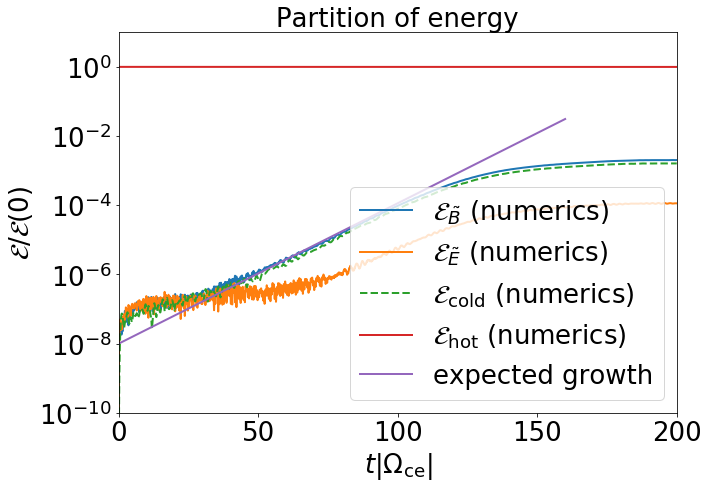

In [72]:
f4 = plt.figure()
f4.set_figheight(7)
f4.set_figwidth(10)

en_tot = en_B + en_E + en_jc + en_jh

Nt = len(en_B) - 1
tn = np.linspace(0, Nt*dt*saving_step, Nt + 1) 
tg = np.linspace(0, 160, 100)

plt.semilogy(tn, en_B/en_tot[0], linewidth = 2, label = r'$\mathcal{E}_\tilde{B}$ (numerics)')
plt.semilogy(tn, en_E/en_tot[0], linewidth = 2, label = r'$\mathcal{E}_\tilde{E}$ (numerics)')
plt.semilogy(tn, en_jc/en_tot[0], '--', linewidth = 2, label = r'$\mathcal{E}_\mathrm{cold}$ (numerics)')
plt.semilogy(tn, en_jh/en_tot[0], linewidth = 2, label = r'$\mathcal{E}_\mathrm{hot}$ (numerics)')
plt.semilogy(tg, 1e-8*np.exp(tg*gamma*2), label = 'expected growth', linewidth = 2)

plt.xlabel('$t|\Omega_\mathrm{ce}|$')
plt.ylabel(r'$\mathcal{E} / \mathcal{E}(0)$')
plt.title('Partition of energy', fontsize = fontsize)
plt.ylim((1e-10, 1e1))
plt.xlim((0, 200))
plt.legend()
#plt.savefig('/home/florian/Schreibtisch/Masterarbeit/05_Präsentationen/04_Ringberg/01_Figures/Energies_ConCode_WithCV.pdf', bbox_inches = 'tight')

## 1.5 Check energy conservation

Text(0.5,1,'Relative error in total energy')

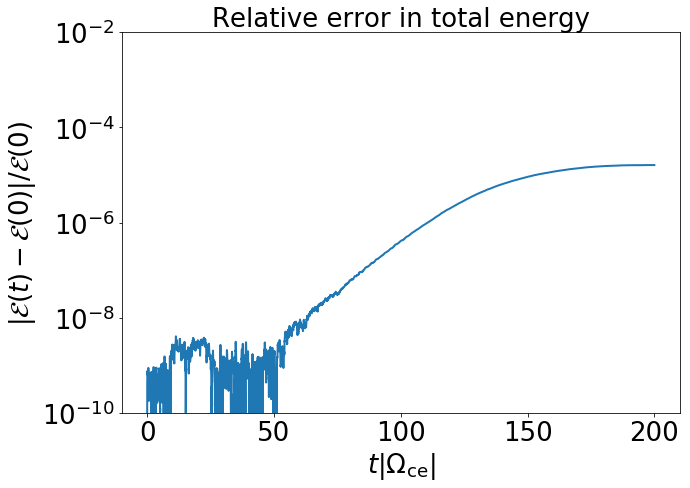

In [69]:
f5 = plt.figure()
f5.set_figheight(7)
f5.set_figwidth(10)

en_tot = en_B + en_E + en_jc + en_jh

Nt = len(en_B) - 1
tn = np.linspace(0, Nt*dt*saving_step, Nt + 1) 

plt.semilogy(tn, np.abs(en_tot - en_tot[0])/en_tot[0], linewidth = 2)
plt.ylim((1e-10, 1e-2))
plt.xlabel('$t|\Omega_\mathrm{ce}|$')
plt.ylabel('$|\mathcal{E}(t) - \mathcal{E}(0)|/\mathcal{E}(0)$')
plt.title('Relative error in total energy', fontsize = fontsize)
#plt.savefig('/home/florian/Schreibtisch/Masterarbeit/05_Präsentationen/04_Ringberg/01_Figures/Conservation_ConCode_WithCV', bbox_inches = 'tight')

#data = np.loadtxt('/home/florian/Schreibtisch/Masterarbeit/05_Präsentationen/04_Ringberg/01_Figures/Energies_ConCode.pdf')

## 1.6 Particle orbits 

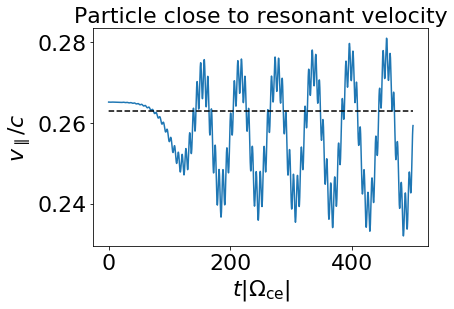

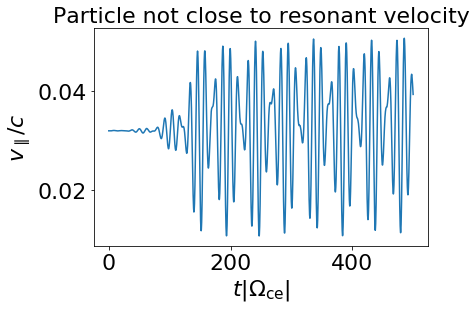

In [204]:
f6 = plt.figure()
f6.set_figheight(4)
f6.set_figwidth(6)

plt.plot(tn, v_par[:, 11])
plt.plot(tn, np.ones(len(tn))*vR, 'k--')
plt.xlabel('$t|\Omega_\mathrm{ce}|$')
plt.ylabel('$v_\parallel/c$')
plt.title('Particle close to resonant velocity', fontsize = fontsize)
plt.savefig('/home/florian/Schreibtisch/Masterarbeit/05_Präsentationen/04_Ringberg/01_Figures/Trapped_Anisotropic', bbox_inches = 'tight')

f7 = plt.figure()
f7.set_figheight(4)
f7.set_figwidth(6)

plt.plot(tn, v_par[:, 2])
plt.xlabel('$t|\Omega_\mathrm{ce}|$')
plt.ylabel('$v_\parallel/c$')
plt.title('Particle not close to resonant velocity', fontsize = fontsize)
plt.savefig('/home/florian/Schreibtisch/Masterarbeit/05_Präsentationen/04_Ringberg/01_Figures/Passing_Anisotropic', bbox_inches = 'tight')

v_0 =  [0.26508671 0.27742024]


(0, 3.141592653589793)

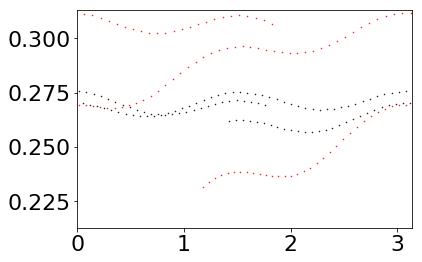

In [314]:
part = np.array([11, 31])
color = ['k', 'r']
t_start = 800
t_end = 900

print('v_0 = ', v_par[0, part])

for i in range(len(part)):
    plt.plot(positions[t_start:t_end, part[i]], v_par[t_start:t_end, part[i]], '.', color = color[i], markersize = 1)

plt.ylim((vR - 0.05, vR + 0.05))
plt.xlim((0, Lz))

In [66]:
# plot distribution function
Nbin = 256
fdens = np.zeros((Nbin, Nbin))
fdensv = np.zeros((Nbin, Nbin))

dz_bin = Lz/Nbin
dv_bin = Lv/Nbin
z_bin = np.linspace(0, Lz, Nbin + 1)
z_bin = np.delete(z_bin, -1) + dz_bin/2
v_bin = np.linspace(-Lv/2, Lv/2, Nbin + 1)
v_bin = np.delete(v_bin, -1) + dv_bin/2

Zedges = np.linspace(0, Lz, Nbin + 1)
Vedges = np.linspace(-Lv/2, Lv/2, Nbin + 1)
ZZ, VV = np.meshgrid(z_bin, v_bin)
binVol = dz_bin*dv_bin

Vedges_perp = np.linspace(0, Lv/2, Nbin + 1)
dv_bin_perp = Lv/2/Nbin
v_bin_perp = np.delete(Vedges_perp, -1) + dv_bin_perp/2
VVpar, VVperp = np.meshgrid(v_bin, v_bin_perp)

# ... update distribution function
Zbin = np.digitize(particles[:, 0], Zedges) - 1
Vbin = np.digitize(particles[:, 3], Vedges) - 1

for i in range(0, Nbin):
    fdens[:, i] = np.bincount(Vbin[np.where(Zbin == i)[0]], particles[np.where(Zbin == i)[0], 4], Nbin)

fdens = fdens/(Np*binVol)
# ...


vperp = np.sqrt(particles[:, 1]**2 + particles[:, 2]**2)

# ... update distribution function
Vbin_perp = np.digitize(vperp, Vedges_perp) - 1
Vbin_z = np.digitize(particles[:, 3], Vedges) - 1

for i in range(0, Nbin):
    fdensv[:, i] = np.bincount(Vbin_perp[np.where(Vbin_z == i)[0]], particles[np.where(Vbin_z == i)[0], 4], Nbin)

fdensv = fdensv/(Np*dv_bin*dv_bin_perp) + 0*fh0(0, VVperp/np.sqrt(2), VVperp/np.sqrt(2), VVpar, 0)
# ...

Text(0,0.5,'$v_\\parallel$')

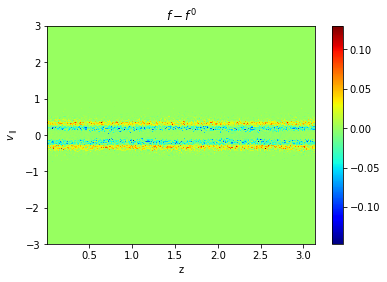

In [67]:
plt.pcolor(ZZ, VV, fdens, cmap = 'jet')
#plt.ylim((0.0,0.5))
#plt.xlim((1.0,2.5))
plt.colorbar()
plt.title('$f-f^0$')
plt.xlabel('z')
plt.ylabel('$v_\parallel$')

In [78]:
import sobol_seq
import matplotlib.pyplot as plt
import numpy as np

In [99]:
vec = sobol_seq.i4_sobol_generate(4, 100000, skip = 2)

In [100]:
vec[:, 0]

array([0.5      , 0.75     , 0.25     , ..., 0.5454483, 0.0454483,
       0.0610733])

In [81]:
from scipy.stats import norm

In [90]:
test = norm.ppf(vec)

(array([  3.,   4.,   9.,  19.,  38.,  66., 113., 183., 276., 396., 534.,
        675., 809., 909., 967., 966., 909., 809., 676., 533., 395., 277.,
        183., 113.,  66.,  37.,  19.,   9.,   4.,   3.]),
 array([-1.94421452e+00, -1.81460022e+00, -1.68498592e+00, -1.55537162e+00,
        -1.42575732e+00, -1.29614301e+00, -1.16652871e+00, -1.03691441e+00,
        -9.07300110e-01, -7.77685808e-01, -6.48071507e-01, -5.18457206e-01,
        -3.88842904e-01, -2.59228603e-01, -1.29614301e-01,  2.22044605e-16,
         1.29614301e-01,  2.59228603e-01,  3.88842904e-01,  5.18457206e-01,
         6.48071507e-01,  7.77685808e-01,  9.07300110e-01,  1.03691441e+00,
         1.16652871e+00,  1.29614301e+00,  1.42575732e+00,  1.55537162e+00,
         1.68498592e+00,  1.81460022e+00,  1.94421452e+00]),
 <a list of 30 Patch objects>)

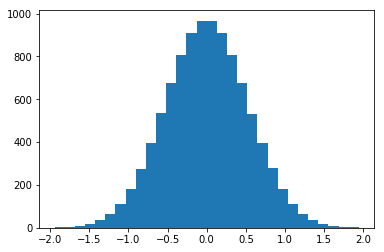

In [93]:
plt.hist(test.flatten()*0.53, bins=30)

(array([7.0000e+00, 9.0000e+00, 2.1000e+01, 3.8000e+01, 6.3000e+01,
        1.2000e+02, 1.2100e+02, 9.9000e+01, 2.6500e+02, 3.6080e+03,
        4.9620e+03, 3.6020e+03, 5.3380e+03, 1.2868e+04, 1.8588e+04,
        1.7575e+04, 1.4368e+04, 5.8420e+03, 2.9810e+03, 3.0490e+03,
        4.7500e+03, 1.1370e+03, 1.3100e+02, 1.6700e+02, 1.3900e+02,
        6.7000e+01, 4.6000e+01, 2.3000e+01, 8.0000e+00, 8.0000e+00]),
 array([-3.12432401, -2.91670222, -2.70908043, -2.50145864, -2.29383685,
        -2.08621506, -1.87859327, -1.67097148, -1.46334969, -1.2557279 ,
        -1.04810611, -0.84048432, -0.63286253, -0.42524074, -0.21761895,
        -0.00999716,  0.19762463,  0.40524642,  0.61286821,  0.82049   ,
         1.02811179,  1.23573358,  1.44335537,  1.65097716,  1.85859895,
         2.06622074,  2.27384253,  2.48146433,  2.68908612,  2.89670791,
         3.1043297 ]),
 <a list of 30 Patch objects>)

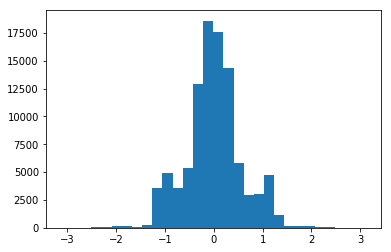

In [96]:
plt.hist(particles[:, 1], bins=30)

(array([4.000e+00, 1.200e+01, 3.700e+01, 9.500e+01, 2.060e+02, 4.500e+02,
        7.310e+02, 1.124e+03, 1.523e+03, 1.549e+03, 1.461e+03, 1.114e+03,
        8.180e+02, 4.700e+02, 2.320e+02, 1.180e+02, 4.200e+01, 1.100e+01,
        2.000e+00, 1.000e+00]),
 array([-3.78535133, -3.39020095, -2.99505058, -2.5999002 , -2.20474983,
        -1.80959945, -1.41444908, -1.0192987 , -0.62414833, -0.22899795,
         0.16615242,  0.5613028 ,  0.95645317,  1.35160355,  1.74675392,
         2.1419043 ,  2.53705467,  2.93220505,  3.32735542,  3.7225058 ,
         4.11765617]),
 <a list of 20 Patch objects>)

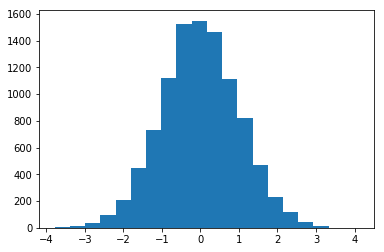

In [64]:
plt.hist(test2, bins = 20)

In [91]:
test

array([[ 0.        ],
       [ 0.67448975],
       [-0.67448975],
       ...,
       [ 0.16893887],
       [-1.49791524],
       [-1.2911396 ]])

In [3]:
from hammersley import hammersley_sequence

In [22]:
test = np.loadtxt('/home/florian/Schreibtisch/Masterarbeit/03_Codes/02_Matlab/Sobol_numbers.txt')

NameError: name 'np' is not defined

In [105]:
test

array([0.25  , 0.75  , 0.125 , ..., 0.9741, 0.021 , 0.521 ])

In [44]:
en_B

array([7.85398152e-09, 7.84985449e-09, 7.81407385e-09, ...,
       4.14367563e-04, 4.15122327e-04, 4.16296011e-04])

In [27]:
test[0]

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

In [33]:
test = hammersley_sequence(0, 1000 - 1, 4, 1000 - 1)

In [34]:
norm.ppf(test[1])

array([           -inf,  0.00000000e+00, -6.74489750e-01,  6.74489750e-01,
       -1.15034938e+00,  3.18639364e-01, -3.18639364e-01,  1.15034938e+00,
       -1.53412054e+00,  1.57310685e-01, -4.88776411e-01,  8.87146559e-01,
       -8.87146559e-01,  4.88776411e-01, -1.57310685e-01,  1.53412054e+00,
       -1.86273187e+00,  7.84124127e-02, -5.79132162e-01,  7.76421761e-01,
       -1.00999017e+00,  4.02250065e-01, -2.37202109e-01,  1.31801090e+00,
       -1.31801090e+00,  2.37202109e-01, -4.02250065e-01,  1.00999017e+00,
       -7.76421761e-01,  5.79132162e-01, -7.84124127e-02,  1.86273187e+00,
       -2.15387469e+00,  3.91760855e-02, -6.26099012e-01,  7.24514383e-01,
       -1.07751557e+00,  3.60129892e-01, -2.77690440e-01,  1.22985876e+00,
       -1.41779714e+00,  1.97099084e-01, -4.45096525e-01,  9.46781756e-01,
       -8.30510878e-01,  5.33409706e-01, -1.17769875e-01,  1.67593972e+00,
       -1.67593972e+00,  1.17769875e-01, -5.33409706e-01,  8.30510878e-01,
       -9.46781756e-01,  

(array([  2.,   4.,   8.,  15.,  26.,  41.,  62.,  83., 102., 115., 119.,
        112.,  97.,  77.,  55.,  37.,  22.,  12.,   7.,   3.]),
 array([-3.09726908, -2.79812388, -2.49897868, -2.19983348, -1.90068828,
        -1.60154308, -1.30239788, -1.00325268, -0.70410748, -0.40496228,
        -0.10581708,  0.19332812,  0.49247332,  0.79161852,  1.09076372,
         1.38990891,  1.68905411,  1.98819931,  2.28734451,  2.58648971,
         2.88563491]),
 <a list of 20 Patch objects>)

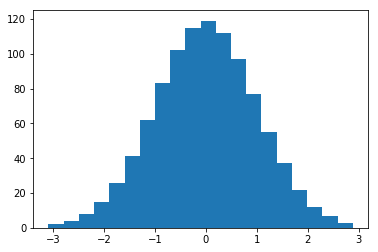

In [37]:
import matplotlib.pyplot as plt
plt.hist(norm.ppf(test[1])[1:], bins = 20)